In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lista_df = []
lista = [1,2,3,4,5,6,7,8,9,10,14,18,20,30,40,50,75,100]
for i in lista:
    cadena = "resultados_xgboost_h" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_df.append(df)

In [4]:
for i in range(len(lista_df)):
    lista_df[i].columns = lista_df[i].columns.str.strip()


In [24]:
mejor_valor = float('inf')  # Empiezo con infinito
mejor_info = None
mejor_dataframe_idx = None

# REcorro todos los dataframes
for idx, df in enumerate(lista_df):
    fila_minima = df.loc[df['valor'].idxmin()]
    
    if fila_minima['valor'] < mejor_valor:
        mejor_valor = fila_minima['valor']
        mejor_info = fila_minima
        mejor_dataframe_idx = idx

# Muestro resultado
print(f"El menor valor está en el DataFrame número {mejor_dataframe_idx}")
print("Datos de la mejor fila:")
print(mejor_info)


El menor valor está en el DataFrame número 6
Datos de la mejor fila:
max_depth    5.000000
eta          0.010000
valor        0.753621
Name: 14, dtype: float64


In [5]:
for i, df in enumerate(lista_df):
    print(f"DataFrame {i}: columnas ->", df.columns)

DataFrame 0: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 1: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 2: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 3: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 4: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 5: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 6: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 7: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 8: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 9: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 10: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 11: columnas -> Index(['max_depth', 'eta', 'valor'], dtype='object')
DataFrame 12: columnas -> Index(['max_depth', 'eta', 'valor'],

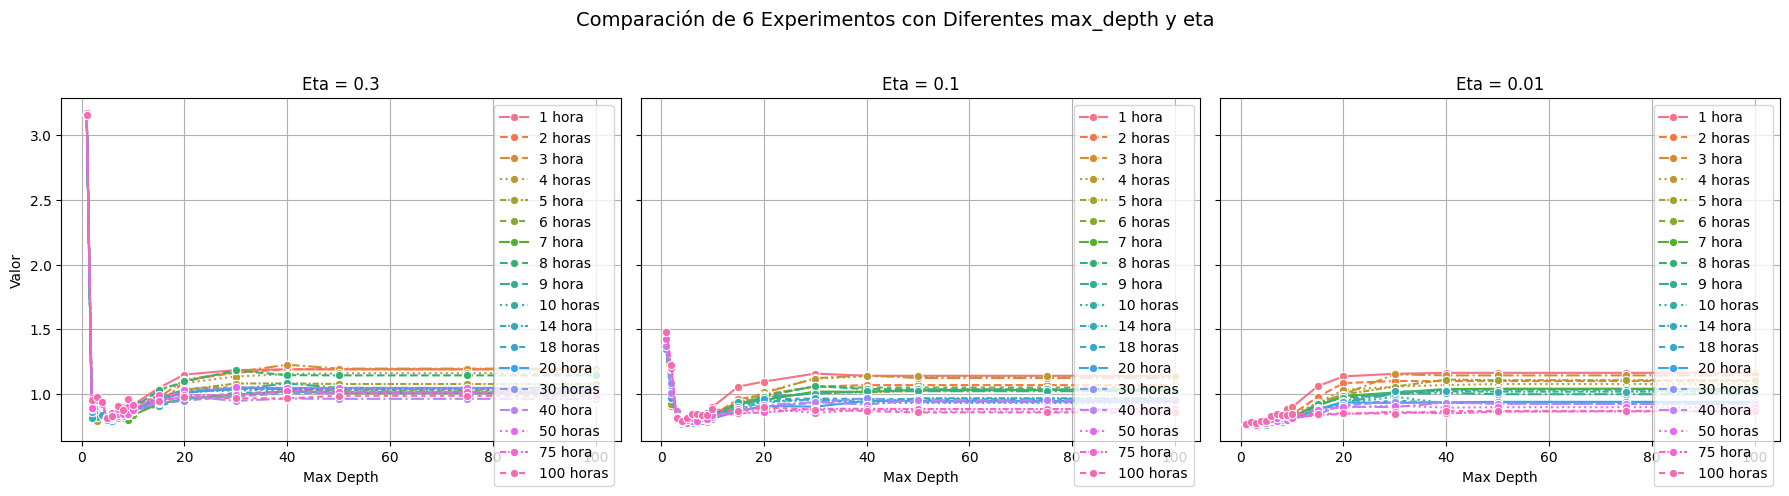

In [6]:
labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]

# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Colores y estilos para diferenciar cada experimento
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  # Repetimos para 18
colores = sns.color_palette("husl", 18)  # 18 colores distintos

# Graficar en los mismos subplots para cada eta
for i, eta in enumerate([0.3, 0.1, 0.01]):
    ax = axes[i]
    ax.set_title(f"Eta = {eta}")
    
    for j, df in enumerate(lista_df):
        df_subset = df[df["eta"] == eta]
        sns.lineplot(data=df_subset, x="max_depth", y="valor", marker="o", ax=ax, 
                     label=labels[j], linestyle=estilos[j], color=colores[j])
    
    ax.set_xlabel("Max Depth")
    if i == 0:
        ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(True)

# Ajustar diseño
plt.suptitle("Comparación de 6 Experimentos con Diferentes max_depth y eta", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar gráfico
plt.show()

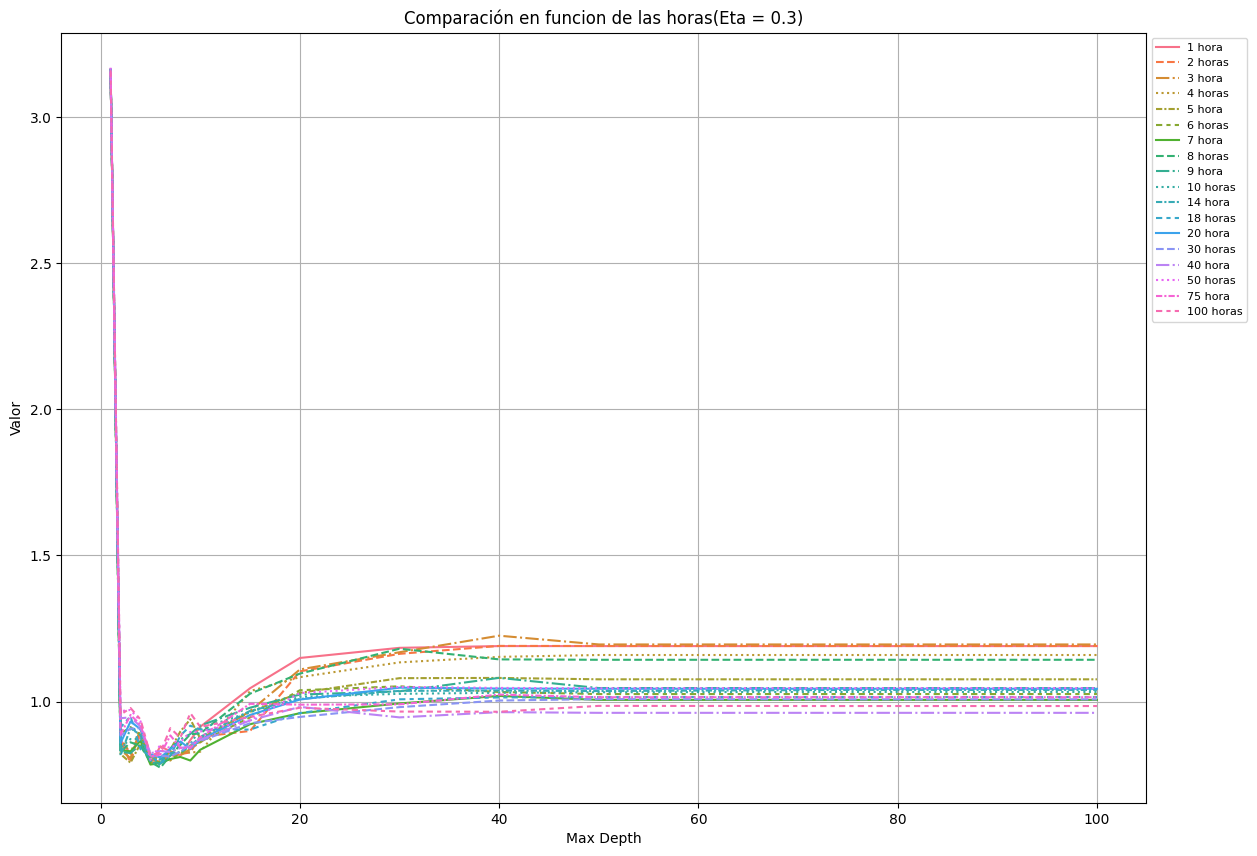

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas(Eta = 0.3)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.3
    df_subset = df[df["eta"] == 0.3]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


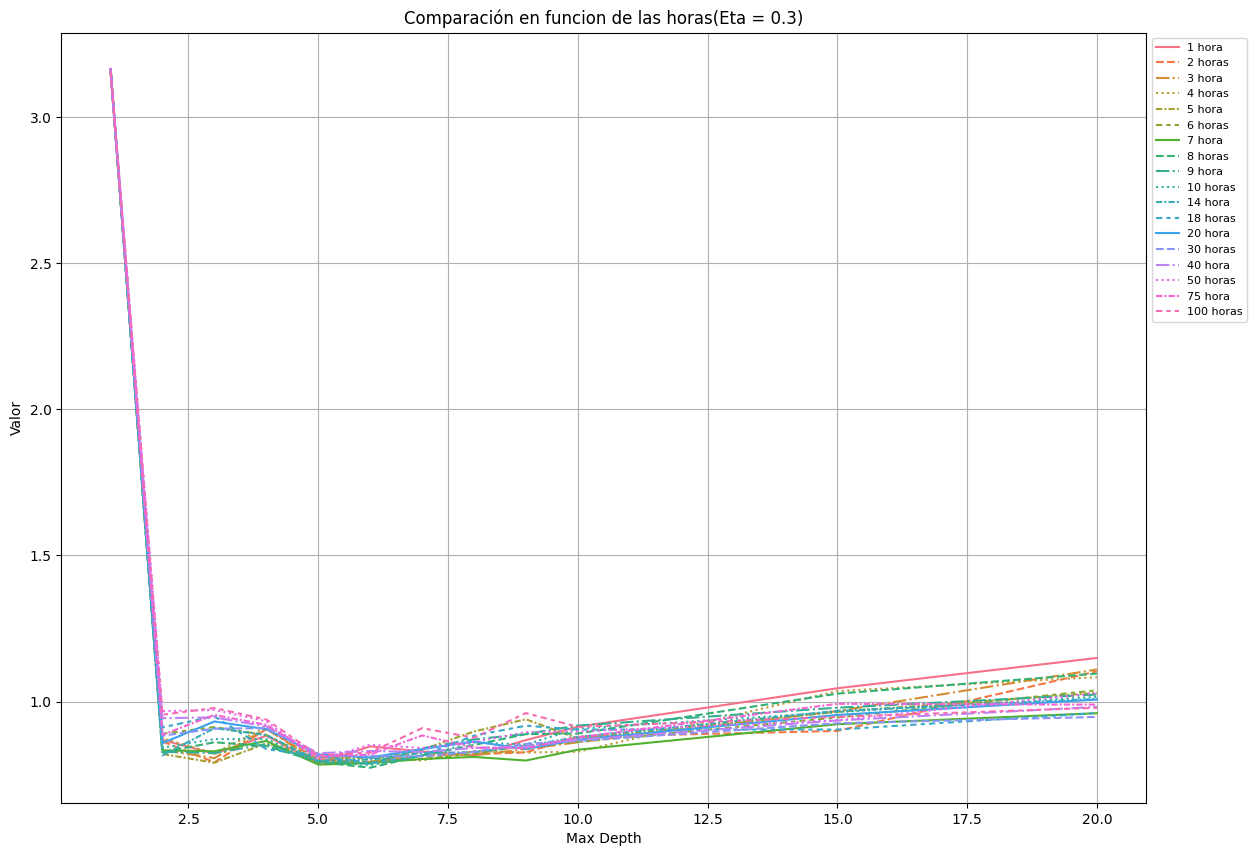

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas(Eta = 0.3)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.3
    df_subset = df[(df["eta"] == 0.3) & (df["max_depth"].between(1, 20))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


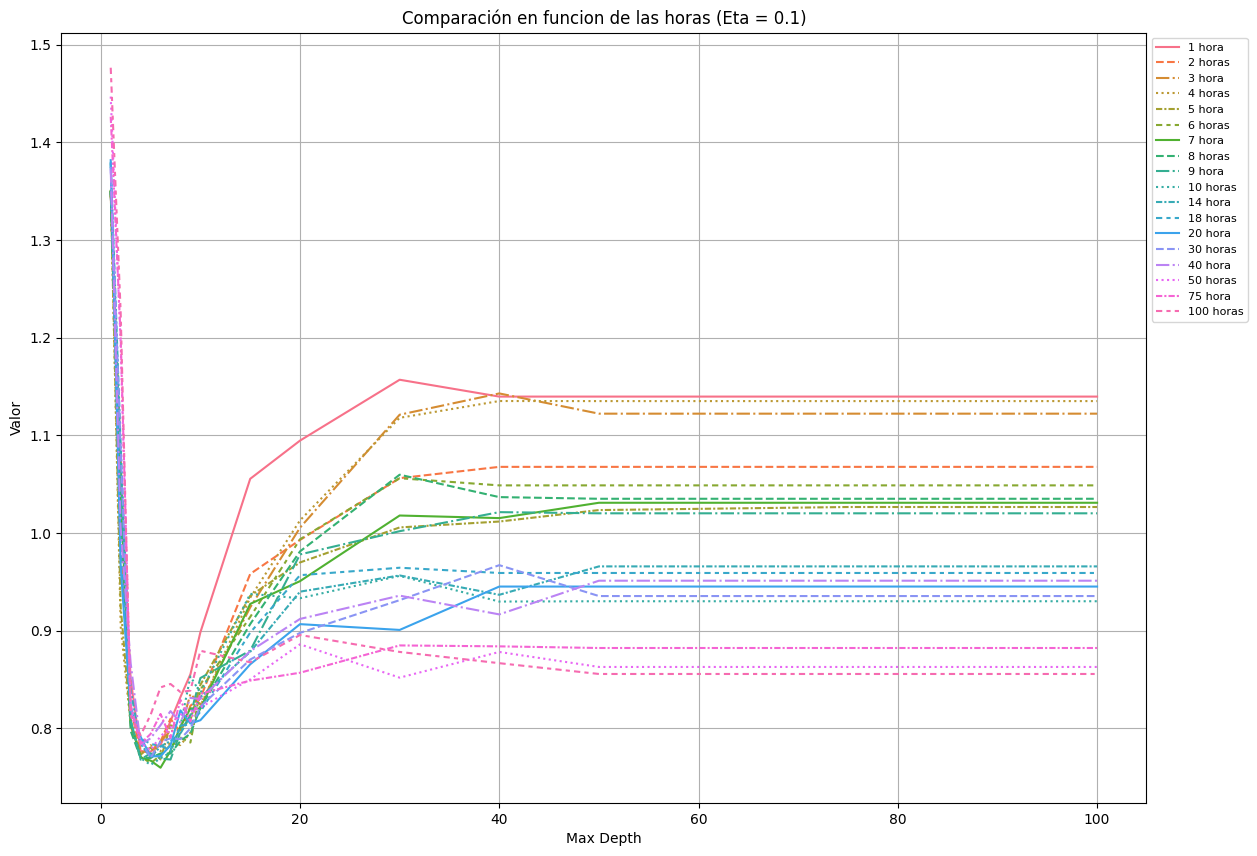

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.1)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.3
    df_subset = df[df["eta"] == 0.1]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


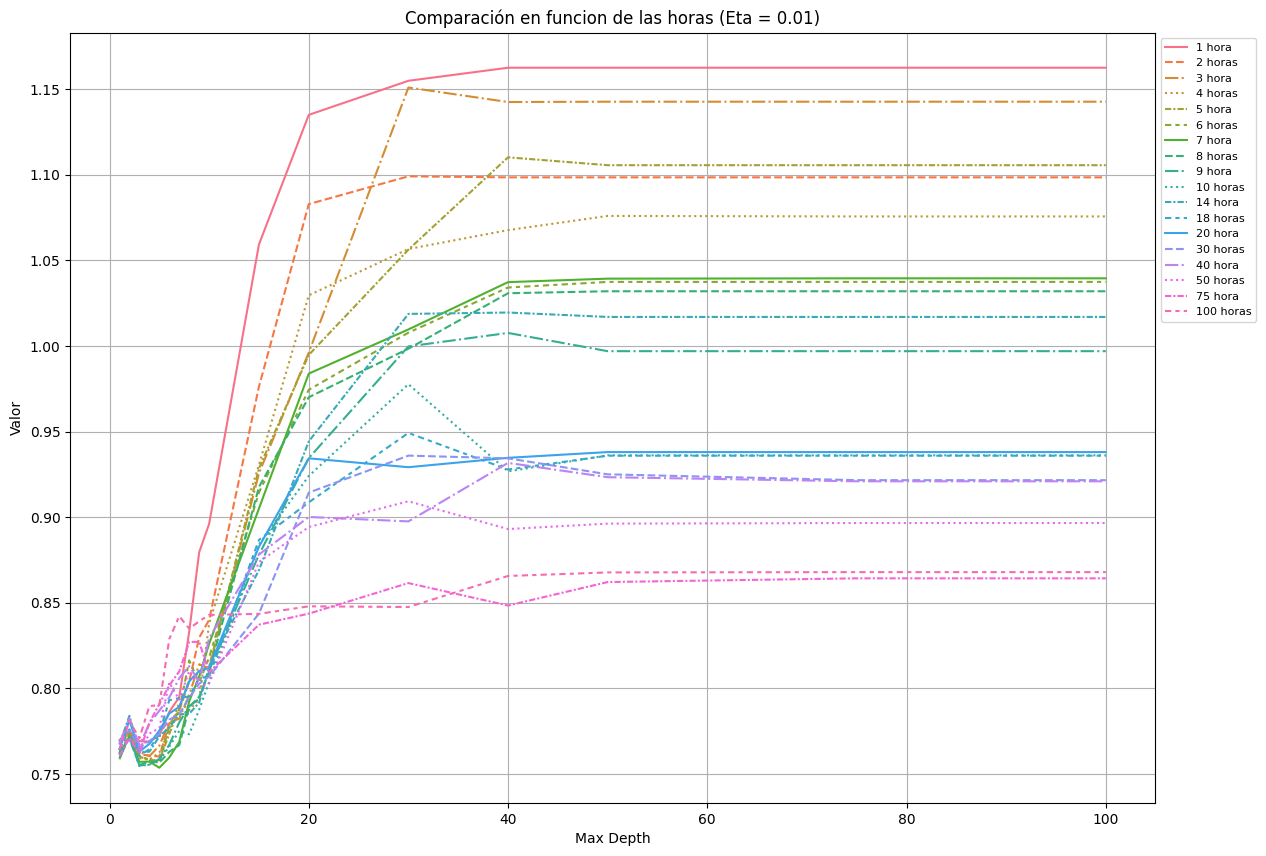

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.01)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.3
    df_subset = df[df["eta"] == 0.01]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


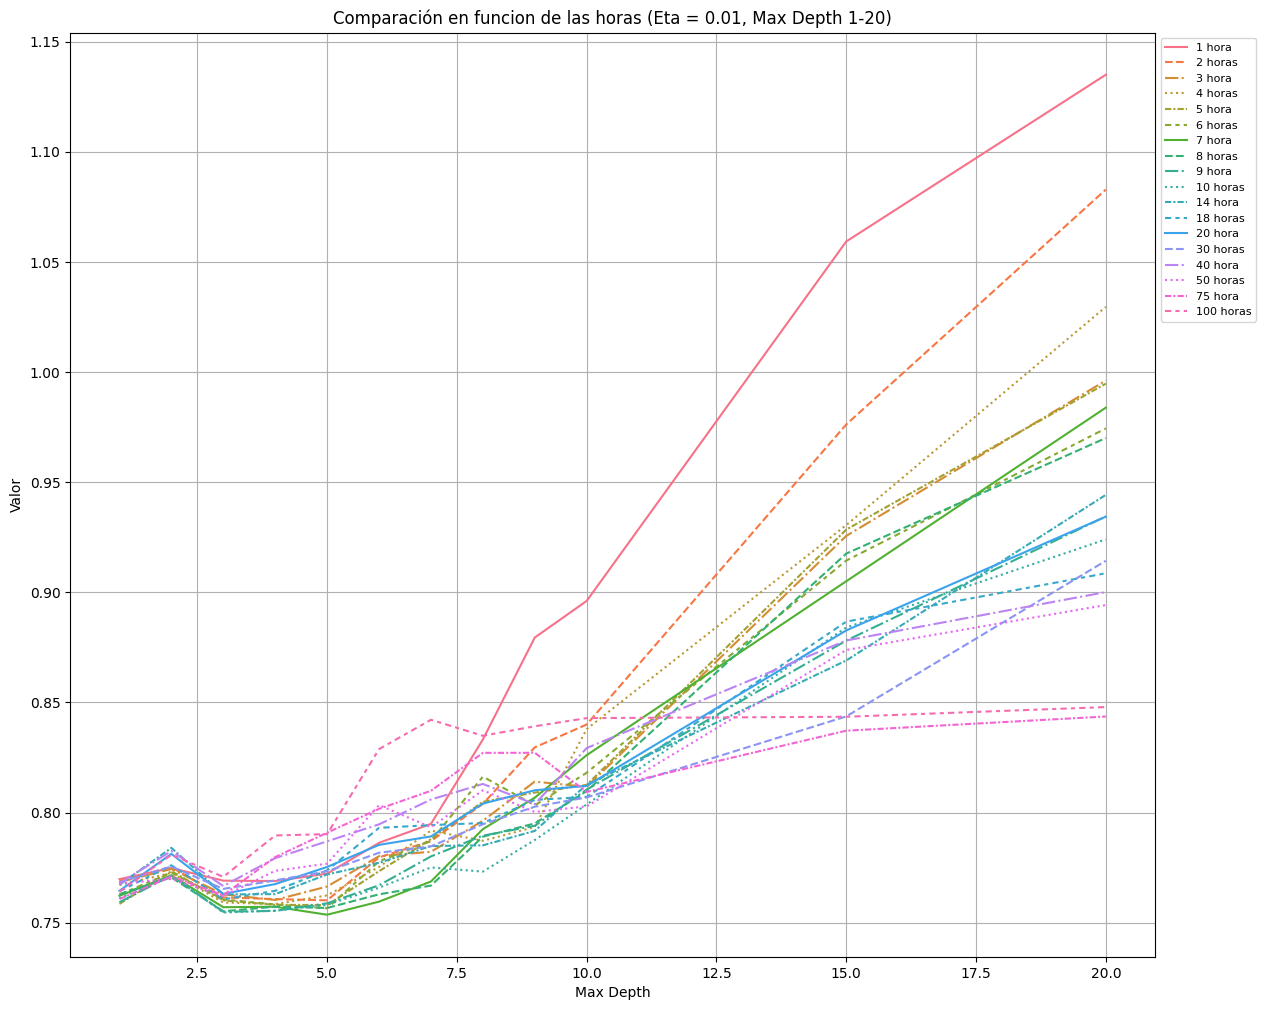

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 12))
plt.title("Comparación en funcion de las horas (Eta = 0.01, Max Depth 1-20)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.01 y max_depth entre 1 y 20
    df_subset = df[(df["eta"] == 0.01) & (df["max_depth"].between(1, 20))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


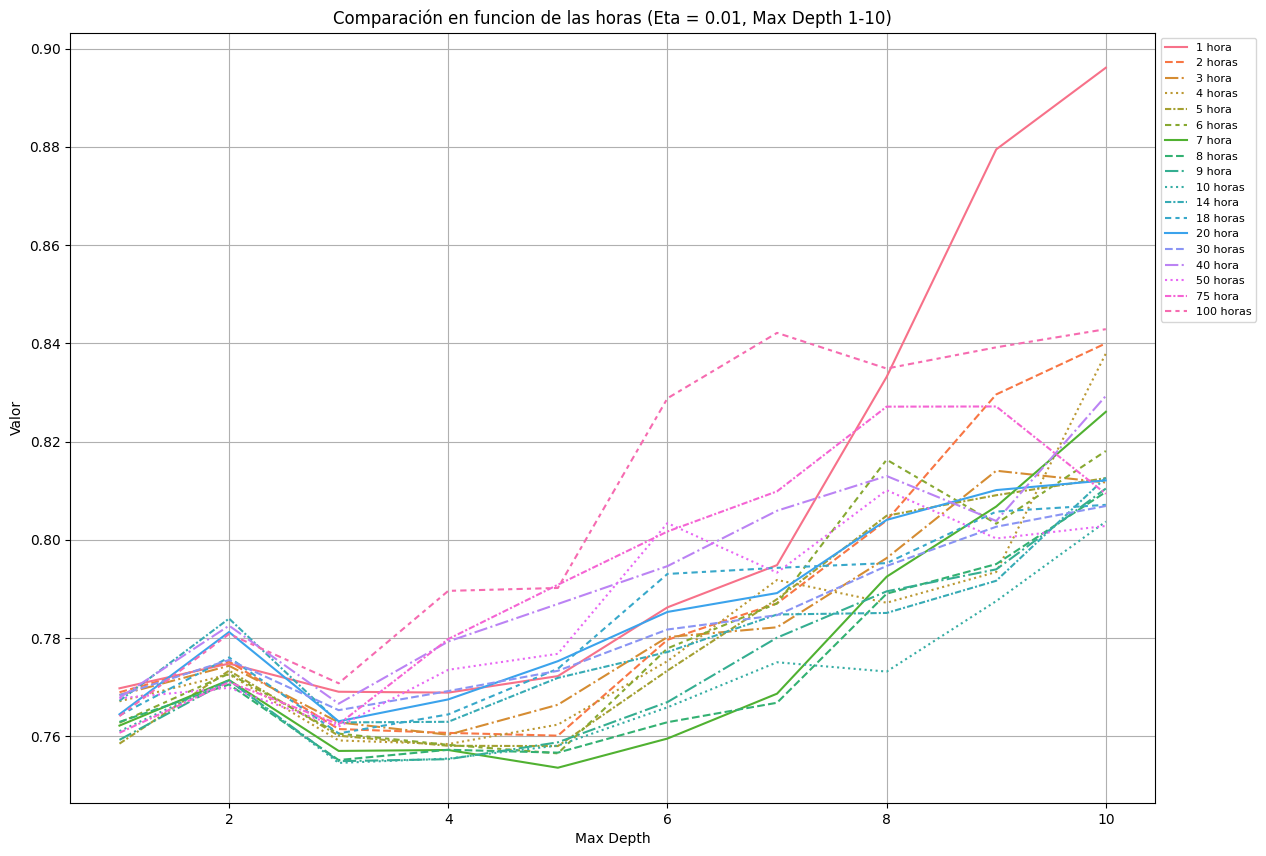

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.01, Max Depth 1-10)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.01 y max_depth entre 1 y 20
    df_subset = df[(df["eta"] == 0.01) & (df["max_depth"].between(1, 10))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor", label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


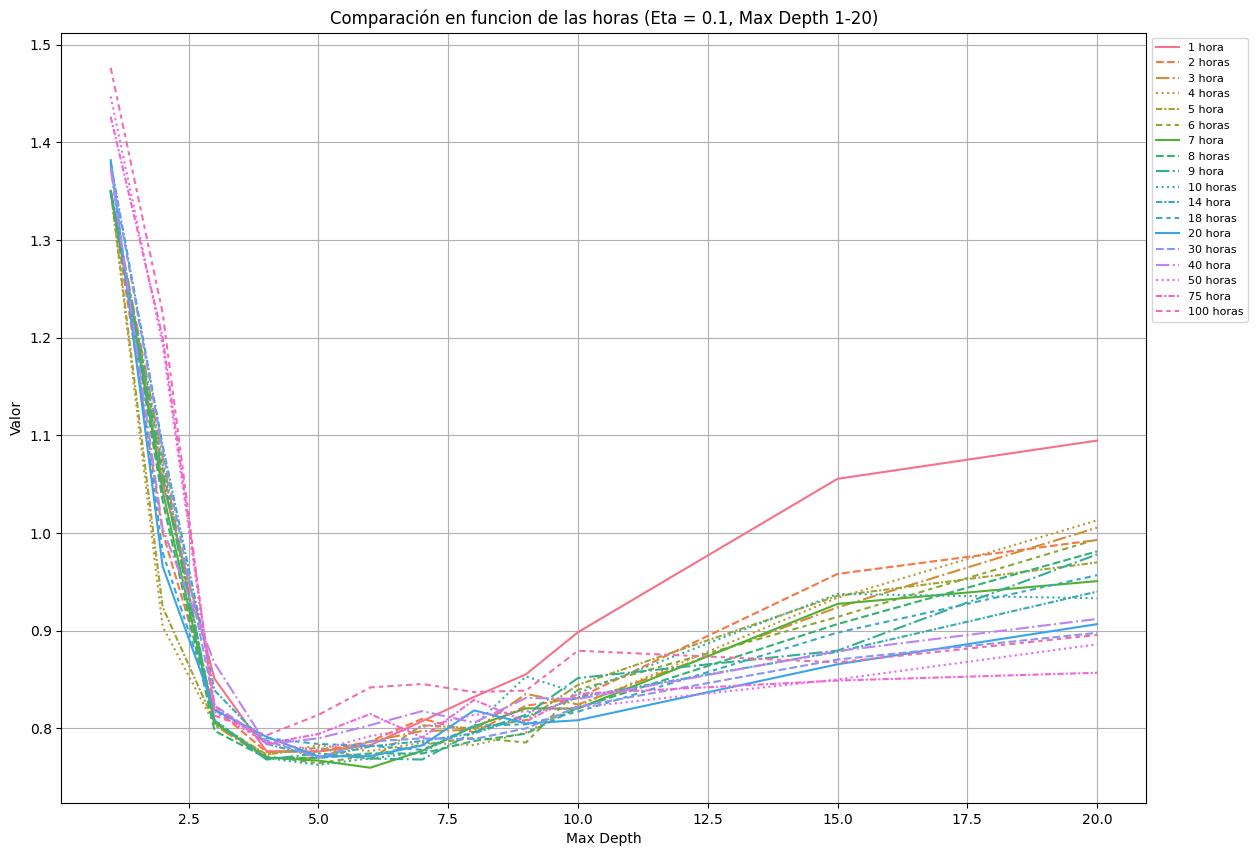

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.1, Max Depth 1-20)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.01 y max_depth entre 1 y 20
    df_subset = df[(df["eta"] == 0.1) & (df["max_depth"].between(1, 20))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


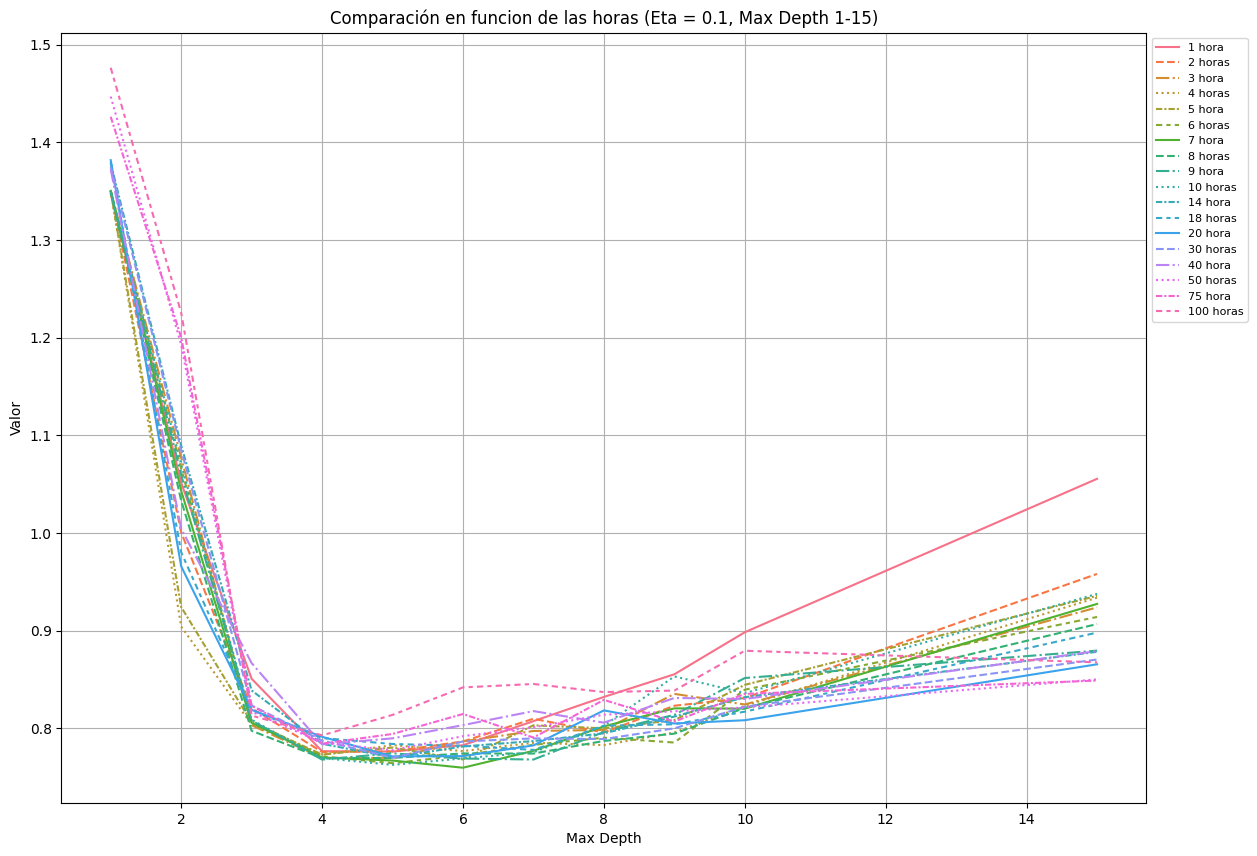

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.1, Max Depth 1-15)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.01 y max_depth entre 1 y 20
    df_subset = df[(df["eta"] == 0.1) & (df["max_depth"].between(1, 15))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor", 
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


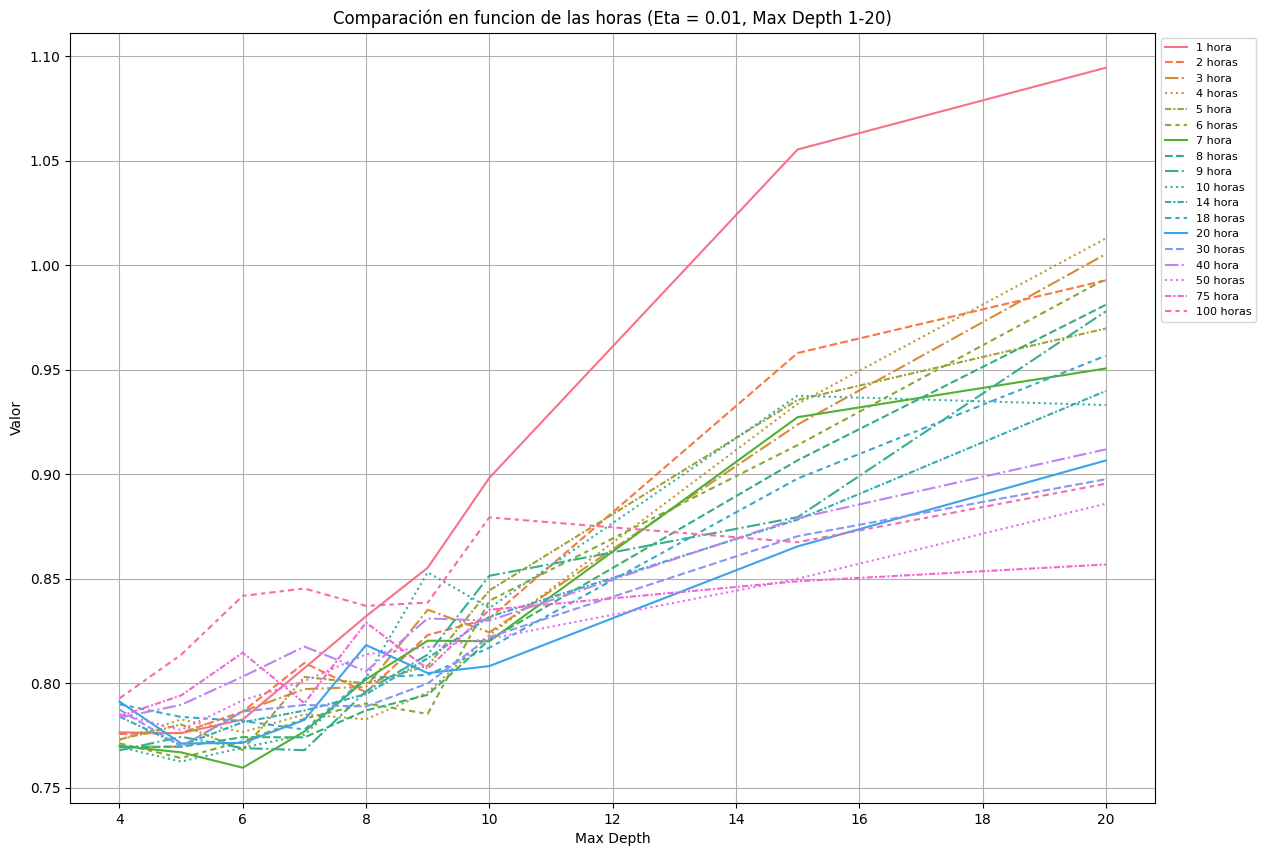

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes una lista de 18 DataFrames en la variable `lista_df`,7,8,9,10,14,18,20,30,40,50,75,100]

labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)  

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en funcion de las horas (Eta = 0.01, Max Depth 1-20)")

for j, df in enumerate(lista_df):
    # Asegurar que los nombres de columna están bien
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    # Filtrar por eta = 0.01 y max_depth entre 1 y 20
    df_subset = df[(df["eta"] == 0.1) & (df["max_depth"].between(4, 20))]
    
    # Graficar
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar la gráfica
plt.show()


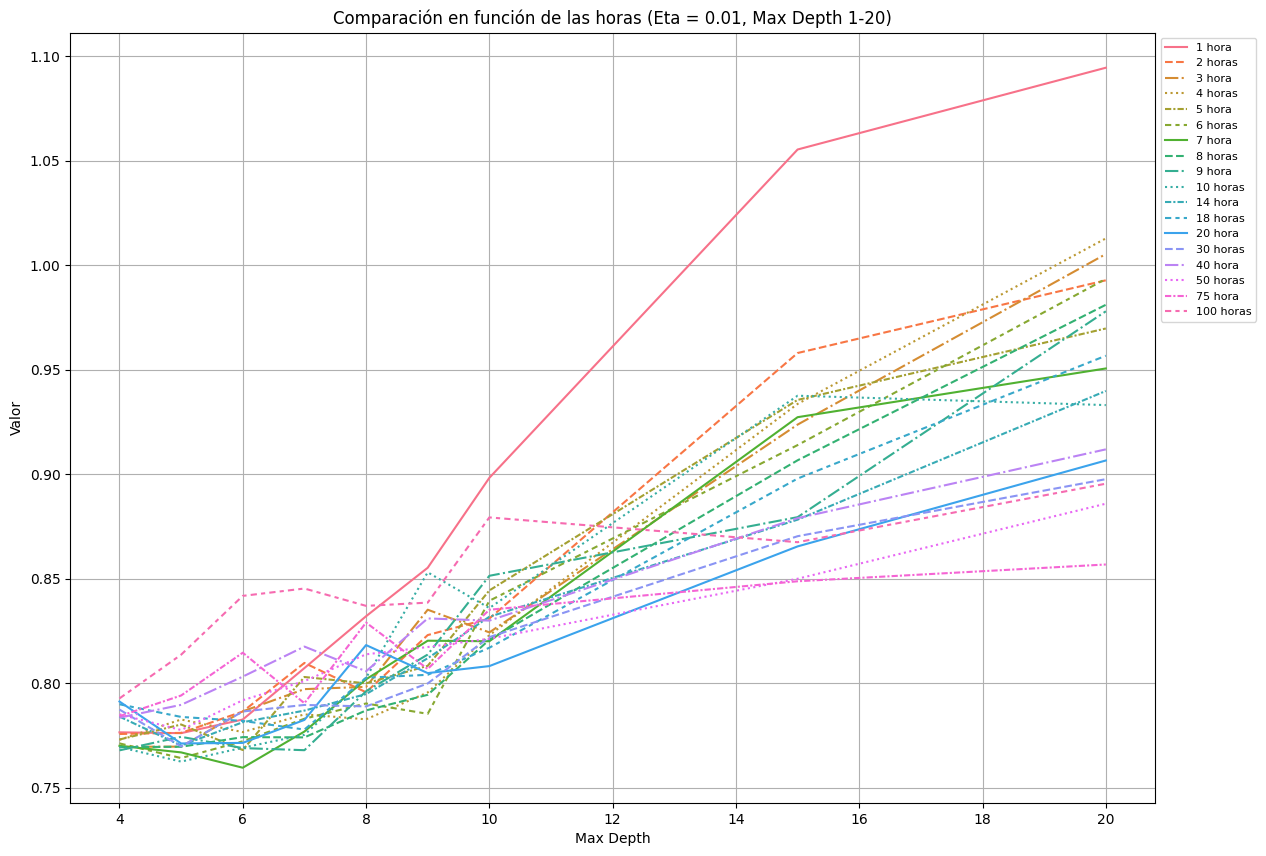

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# labels y estilos
labels = ["1 hora", "2 horas", "3 hora", "4 horas", "5 hora", "6 horas", "7 hora", "8 horas", "9 hora", "10 horas", "14 hora", "18 horas", "20 hora", "30 horas", "40 hora", "50 horas", "75 hora", "100 horas"]
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))] * 3  
colores = sns.color_palette("husl", 18)

# Crear la figura
plt.figure(figsize=(14, 10))
plt.title("Comparación en función de las horas (Eta = 0.01, Max Depth 1-20)")

for j, df in enumerate(lista_df):
    df.columns = df.columns.str.strip()
    df["eta"] = df["eta"].astype(float)

    df_subset = df[(df["eta"] == 0.1) & (df["max_depth"].between(4, 20))]

    # Aquí quitamos marker="o"
    sns.lineplot(data=df_subset, x="max_depth", y="valor",
                 label=labels[j], linestyle=estilos[j], color=colores[j])

plt.xlabel("Max Depth")
plt.ylabel("Valor")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
